# Behaviour of the S&P500 in the close

In [269]:
import sys
sys.executable # Check in which virtual environment I am operating

'/Users/Armellini1/opt/anaconda3/envs/finenv/bin/python'

In [270]:
import numpy as np
import pandas as pd
# Module to retrieve data on financial instruments (similar to 'yahoo finance')
import yfinance as yf 
import matplotlib
from matplotlib import pyplot as plt
import datetime

In [271]:
matplotlib.style.use('seaborn-whitegrid')

## Import data

In [272]:
df = yf.download(tickers='^GSPC', period='max', interval='1d')
df.drop(columns=['Adj Close', 'Open', 'High', 'Low'], inplace = True)

[*********************100%***********************]  1 of 1 completed


In [273]:
print(f"Data from {df.index[0]} to {df.index[-1]}")
df.tail()

Data from 1927-12-30 00:00:00 to 2020-04-09 00:00:00


,Close,Volume
Date,,
2020-04-03,2488.649902,6087190000
2020-04-06,2663.679932,6391860000
2020-04-07,2659.409912,7040720000
2020-04-08,2749.979980,5856370000
2020-04-09,2789.820068,7880140000


In [274]:
df.index[0]

Timestamp('1927-12-30 00:00:00')

## Manipulate Data

In [275]:
df['Change'] = ((df['Close'] - df['Close'].shift(1)) / df['Close'].shift(1)) * 100
df.tail()

,Close,Volume,Change
Date,,,
2020-04-03,2488.649902,6087190000,-1.513713
2020-04-06,2663.679932,6391860000,7.033132
2020-04-07,2659.409912,7040720000,-0.160305
2020-04-08,2749.979980,5856370000,3.405645
2020-04-09,2789.820068,7880140000,1.448741


In [276]:
df['SMA'] = (df['Change'] + df['Change'].shift(1) + df['Change'].shift(2)) * 1/3
df.tail()

,Close,Volume,Change,SMA
Date,,,,
2020-04-03,2488.649902,6087190000,-1.513713,-1.215007
2020-04-06,2663.679932,6391860000,7.033132,2.600785
2020-04-07,2659.409912,7040720000,-0.160305,1.786371
2020-04-08,2749.979980,5856370000,3.405645,3.426157
2020-04-09,2789.820068,7880140000,1.448741,1.564694


## PLOT

In [277]:
from matplotlib.ticker import PercentFormatter
from matplotlib.dates import AutoDateLocator, AutoDateFormatter, ConciseDateFormatter

In [278]:
def manage_patches_color(patches):
    
    for patch in patches:
        if patch.get_height() >= 0:
            patch.set_color('g')
        else: 
            patch.set_color('r')

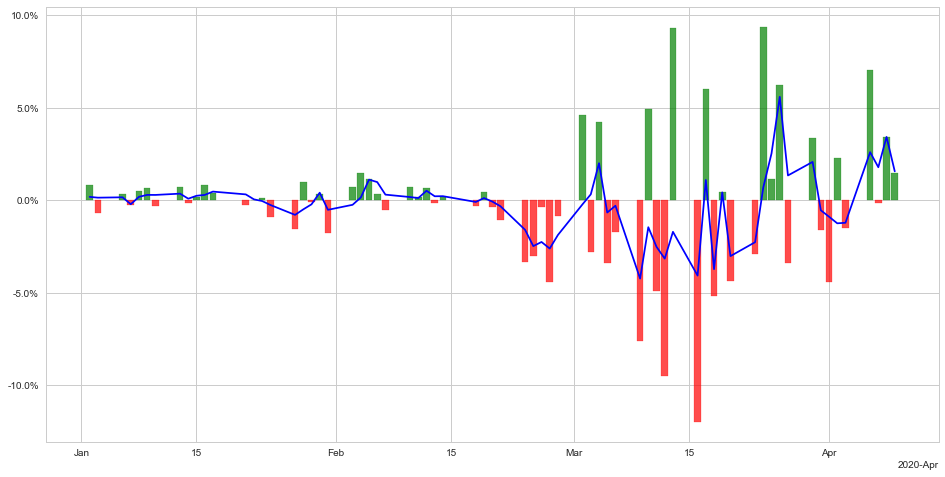

In [279]:
start_date = '2020-01'
end_date = '2020-05'

fig, ax = plt.subplots()
fig.set_size_inches(16,8)
out = ax.bar(x=df.loc[start_date:end_date].index, 
             height=df.loc[start_date:end_date, 'Change'], alpha=0.7)
manage_patches_color(patches=out.patches)
ax.plot(df.loc[start_date:end_date].index, df.loc[start_date:end_date, 'SMA'], 'b-')
ax.yaxis.set_major_formatter(PercentFormatter())
ax.xaxis.set_major_locator(AutoDateLocator())
ax.xaxis.set_major_formatter(ConciseDateFormatter(AutoDateLocator()))